IT21343520-lab1 Task 2

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Loading the dataset
au_data = pd.read_csv('/content/drive/MyDrive/datasets/Au_nanoparticle_dataset.csv')

# Creating new dataframe by filtering specific columns
filtered_df = au_data.drop(columns=['N_total', 'N_bulk', 'N_surface', 'R_avg'])


filtered_df.head(20)


,ID,T,tau,time,Volume,R_min,R_max,R_diff,R_std,R_skew,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,2.710000e-26,15.5898,19.4516,3.8618,0.6230,-0.0435,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,2.780000e-26,15.3996,24.1755,8.7760,0.9295,2.0673,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,7.850000e-26,21.9199,31.0305,9.1106,1.0701,0.3618,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,1.220000e-25,23.2542,37.8795,14.6253,2.3732,0.1431,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,1.860000e-25,27.1200,39.7614,12.6415,1.9397,-0.3849,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390
5,6,273,0.000025,6,2.260000e-25,33.2496,42.9612,9.7116,1.0219,0.3804,...,0,0,0,0,0,0,0,0,-50687.6660,1608.5840
6,7,273,0.000025,7,2.340000e-25,33.6164,41.6168,8.0004,0.8979,0.3041,...,0,0,0,0,0,0,0,0,-52334.7900,1603.6600
7,8,273,0.000025,8,2.360000e-25,34.5185,41.4386,6.9201,0.8595,0.3214,...,0,0,0,0,0,0,0,0,-52912.3150,1620.4550
8,9,273,0.000025,9,2.370000e-25,34.7525,41.5998,6.8473,0.8483,0.3588,...,0,0,0,0,0,0,0,0,-53212.1320,1606.0680
9,10,273,0.000025,10,2.380000e-25,34.7870,41.5401,6.7531,0.8308,0.3666,...,0,0,0,0,0,0,0,0,-53347.8030,1611.1570


#2. Statistical Analysis

In [11]:
mean_values = au_data[['N_total', 'N_bulk', 'N_surface', 'R_avg']].mean()
std_values = au_data[['N_total', 'N_bulk', 'N_surface', 'R_avg']].std()
quartiles = au_data[['N_total', 'N_bulk', 'N_surface', 'R_avg']].quantile([0.25, 0.5, 0.75])

print("Mean Values:\n", mean_values)
print("Standard Deviation:\n", std_values)
print("Quartiles:\n", quartiles)


Mean Values:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64
Standard Deviation:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64
Quartiles:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


#3. Histogram Visualization

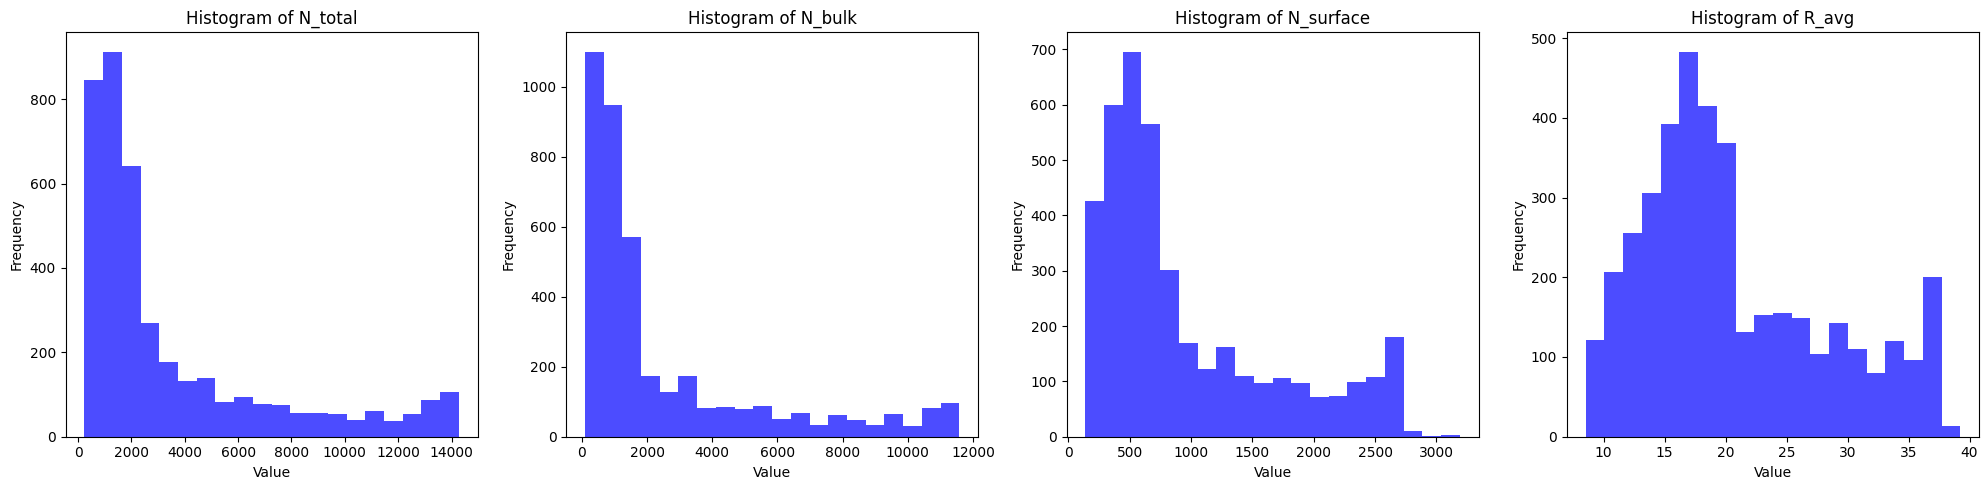

In [15]:
# Plotting histograms for each feature in a 1x4 layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
for i, feature in enumerate(features):
    axes[i].hist(au_data[feature], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#4. Pairplot with Seaborn

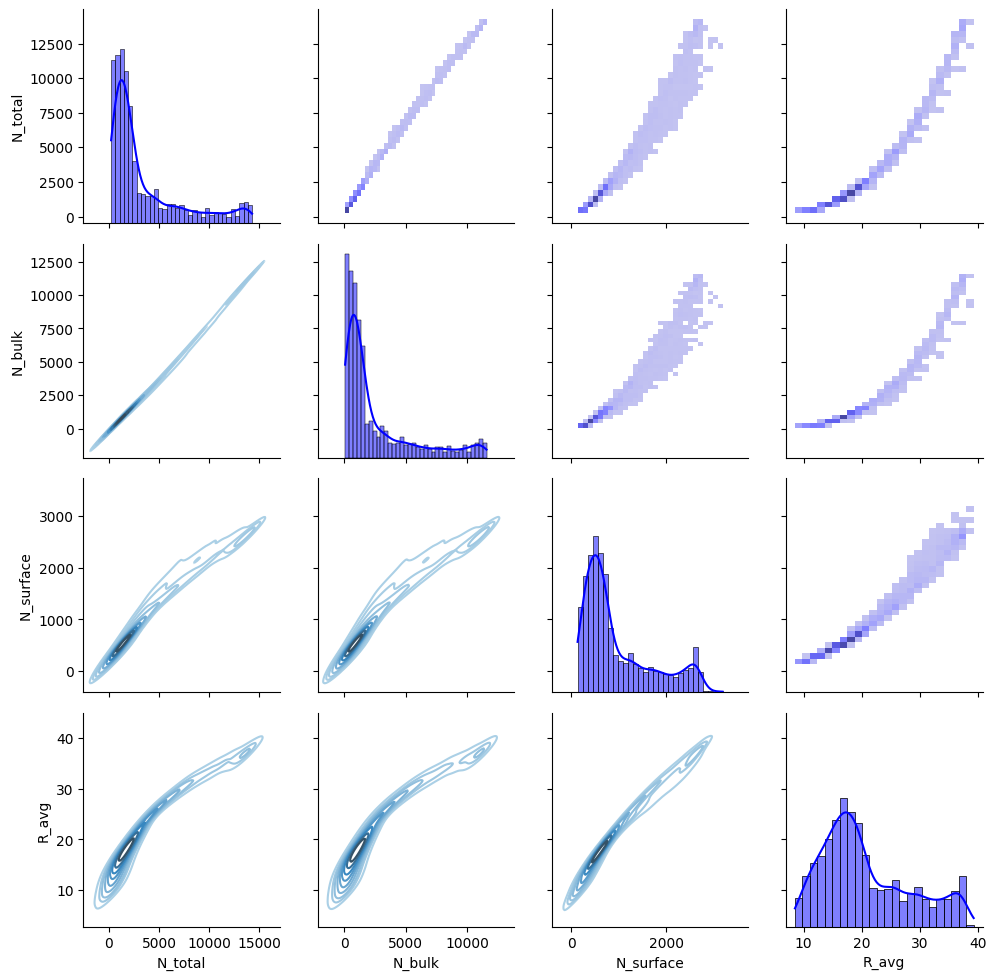

In [16]:
# Pairplot with Seaborn
new_df = au_data[['N_total', 'N_bulk', 'N_surface', 'R_avg']]

g = sns.PairGrid(new_df)
g.map_upper(sns.histplot, color="blue")  # Bivariate histograms
g.map_diag(sns.histplot, kde=True, color="blue")  # Diagonal plots with histograms and KDE
g.map_lower(sns.kdeplot, cmap="Blues_d")  # Bivariate KDE on the lower half
plt.show()
